Factors that Affect Insurance Charges
===

Explorations
===

Quick inspection of data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import files

In [3]:
files.upload()

Saving insurance_regression.csv to insurance_regression.csv


{'insurance_regression.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1

In [4]:
df = pd.read_csv('insurance_regression.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#### **1 Structure of the data** 

Check structure of the data: dimensions, column names, data types, format, etc.

In [4]:
# Return a tuple representing the dimensionality of the DataFrame
# documentation here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape

df.shape

(1338, 7)

In [5]:
# print information about the DataFrame including the data types, column names, non-null values and memory usage
# documentation here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html#pandas.DataFrame.info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# list of column names
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
# data types of each column
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### **2 Summary statistics**

Check mean, median, mode, variability of the numerical columns

In [11]:
# Generate descriptive statistics including those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
# works only for numerical data
# documentation here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
# works only for numerical data
df.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [14]:
df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [17]:
#@title
# variance with ddof = 0
# sum((x_i - x_mean)^2) / n

df.var(ddof=0)

age         1.972539e+02
bmi         3.716009e+01
children    1.452127e+00
charges     1.465428e+08
dtype: float64

In [18]:
#@title
# variance with ddof = 1
# sum((x_i - x_mean)^2) / (n-1)

df.var(ddof=1)

age         1.974014e+02
bmi         3.718788e+01
children    1.453213e+00
charges     1.466524e+08
dtype: float64

In [20]:
#@title
# mean (average) absolute deviation

df.mad()

age           12.248931
bmi            4.897871
children       0.985405
charges     9091.126581
dtype: float64

#### **3 Variability of column entries**

In [ ]:
# NO CUSTOMER ID FOR THE CLEAN DATA

# to count distinct / unique values on pandas
# print(df['customer_id'].nunique())

# to display distinct / unique values on pandas
# print(df['customer_id'].unique())

# to count the non-null values
# print(insurance_df['customer_id'].count())

In [24]:
# inspect all categorical variables

print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [28]:
# inspect all numerical variables

print(df['age'].value_counts(bins=5))
print(df['bmi'].value_counts(bins=4))
print(df['children'].value_counts(bins=5))
print(df['charges'].value_counts(bins=4))

(17.953, 27.2]    362
(45.6, 54.8]      258
(54.8, 64.0]      242
(36.4, 45.6]      239
(27.2, 36.4]      237
Name: age, dtype: int64
(25.252, 34.545]    738
(34.545, 43.838]    311
(15.922, 25.252]    260
(43.838, 53.13]      29
Name: bmi, dtype: int64
(-0.006, 1.0]    898
(1.0, 2.0]       240
(2.0, 3.0]       157
(3.0, 4.0]        25
(4.0, 5.0]        18
Name: children, dtype: int64
(1059.224, 16784.012]     1005
(16784.012, 32446.151]     179
(32446.151, 48108.289]     138
(48108.289, 63770.428]      16
Name: charges, dtype: int64


#### **4 Completeness of the data**

In [ ]:
# get the total sum of missing values in each column

insurance_df.isnull().sum()

customer_id    0
age            0
sex            0
bmi            2
children       0
smoker         0
region         0
charges        3
dtype: int64

In [ ]:
# get the total sum of non-null values in each column

insurance_df.notnull().sum()

customer_id    1339
age            1339
sex            1339
bmi            1337
children       1339
smoker         1339
region         1339
charges        1336
dtype: int64

#### **5 Uniqueness of rows**

Lets look for duplicate rows on the insurance dataset

In [ ]:
# NOT APPLICABLE
# return all duplicated rows based on a column
# print(df[df.duplicated(['customer_id'], keep=False)])

In [31]:
# print the duplicated rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


#### **6 Patterns and Anomalies (Visualize)**

**Data Viz Mantra**

Overview first, zoom and filter, then details on demand

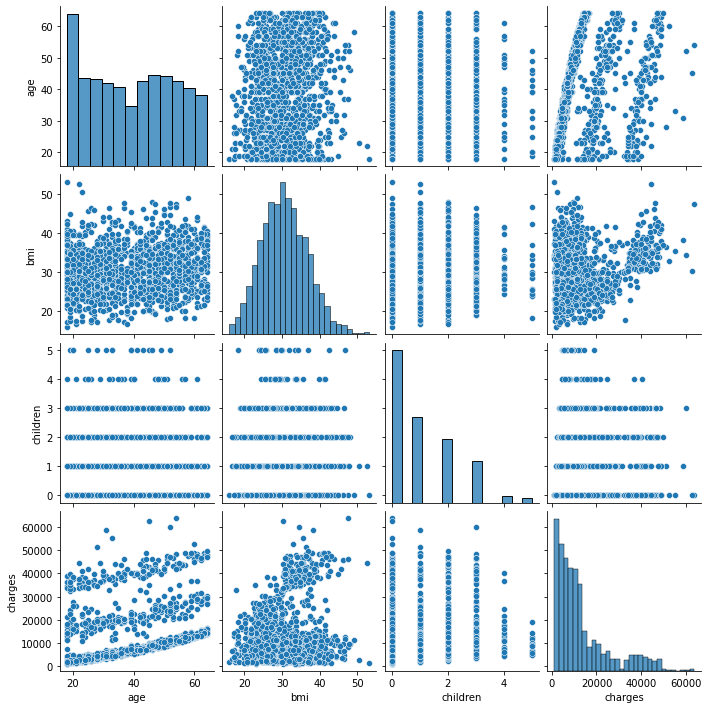

In [32]:
# to explore relationships, scatterplot is the best graph to use
sns.pairplot(df)

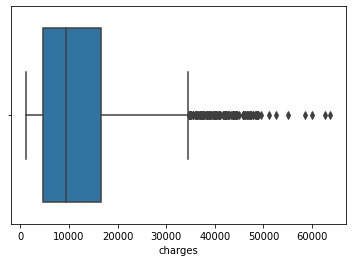

In [33]:
# to look for outliers in terms of insurance charges, we can use boxplot

sns.boxplot(x=df["charges"])

Looks like the insurance charges are "right skewed" - the distribution of the insurance charges is positively skewed, i.e. a large number of the patients are enrolled to lower-priced insurance premiums

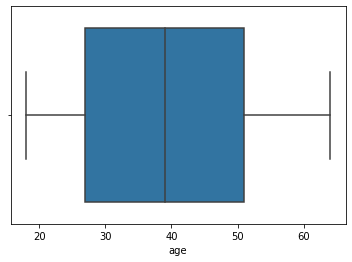

In [34]:
sns.boxplot(x=df["age"])

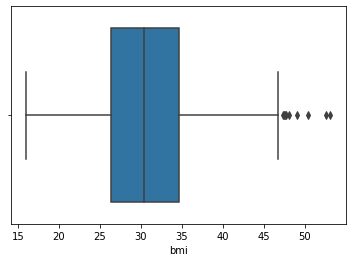

In [35]:
sns.boxplot(x=df["bmi"])

The distribution of the patients' bmi appears symmetric, i.e. has a normal distribution.

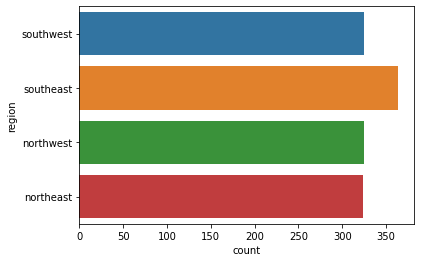

In [36]:
# to count the distribution (number of records) in categorical columns, we can use the countplot 
sns.countplot(y="region", data=df)

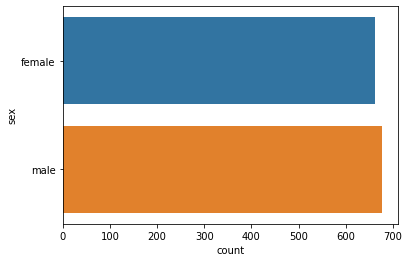

In [37]:
# to count the distribution in categorical columns, we can use the countplot 
sns.countplot(y="sex", data=df)

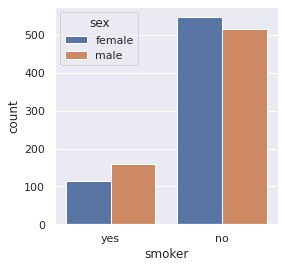

In [43]:
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(x="smoker",hue="sex", data=df)

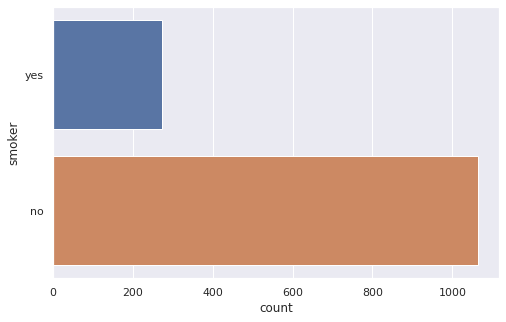

In [40]:
sns.countplot(y="smoker", data=df)

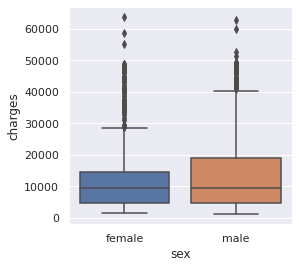

In [44]:
sns.boxplot(x="sex", y="charges", data=df)

[(3000.0, 17000.0)]

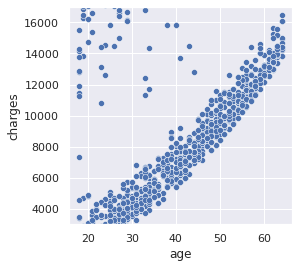

In [45]:
ax = sns.scatterplot(data=df, x="age", y="charges")
# control y-axis limits
ax.set(ylim=(3000, 17000))

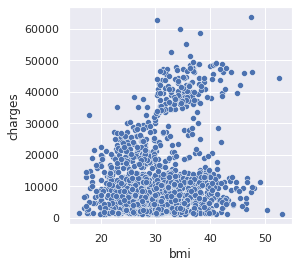

In [46]:
ax = sns.scatterplot(data=df, x="bmi", y="charges")

##### **Smoker vs Non Smoker**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

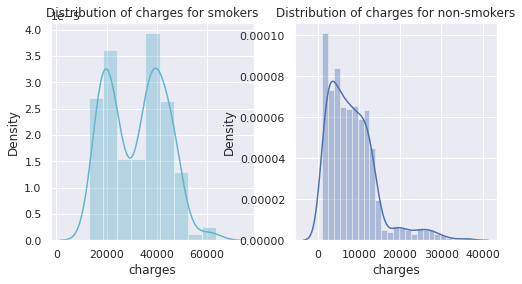

In [49]:
#@title
# Distribution of Charges split by smoker or non-smoker
f= plt.figure(figsize=(8, 4))

ax = f.add_subplot(121)
sns.distplot(df[(df.smoker=='yes')]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax = f.add_subplot(122)
sns.distplot(df[(df.smoker=='no')]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Looks like the non-smokers are getting lower premiums.

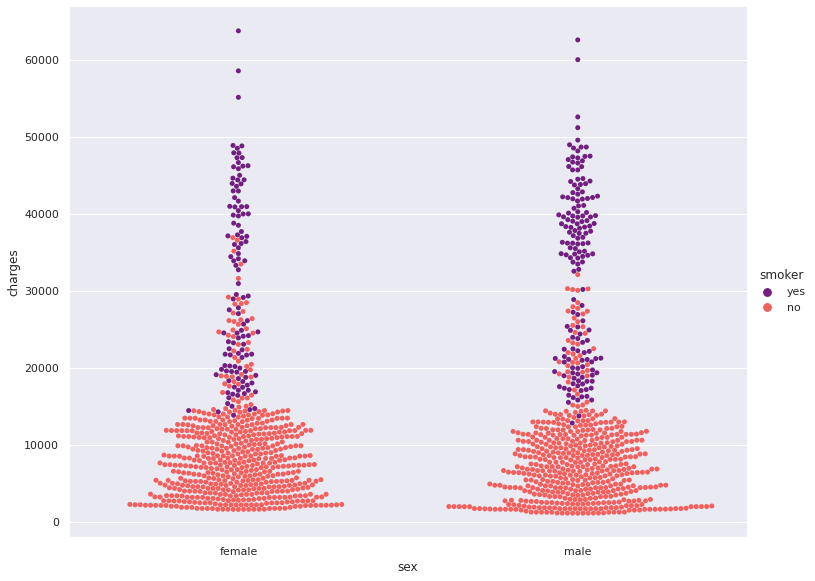

In [51]:
f = sns.catplot(x="sex", y="charges", hue="smoker",
          kind="swarm", data=df, palette = 'magma', height=8, aspect=1.3)

Split by gender,  we still see higher insurance for smokers vs non-smokers.

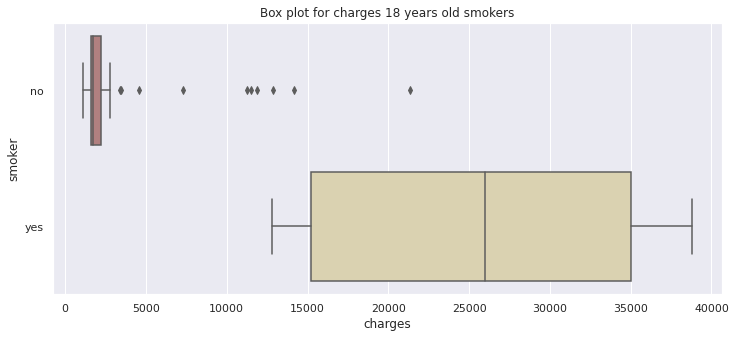

In [53]:
# box plots are the best type of viz when looking for outliers
# Box plot for charges 18 years old smokers
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = 'pink')

18 year old smokers pay around 10 times more than non-smokers.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'aspect'
  **contour_kws,


Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

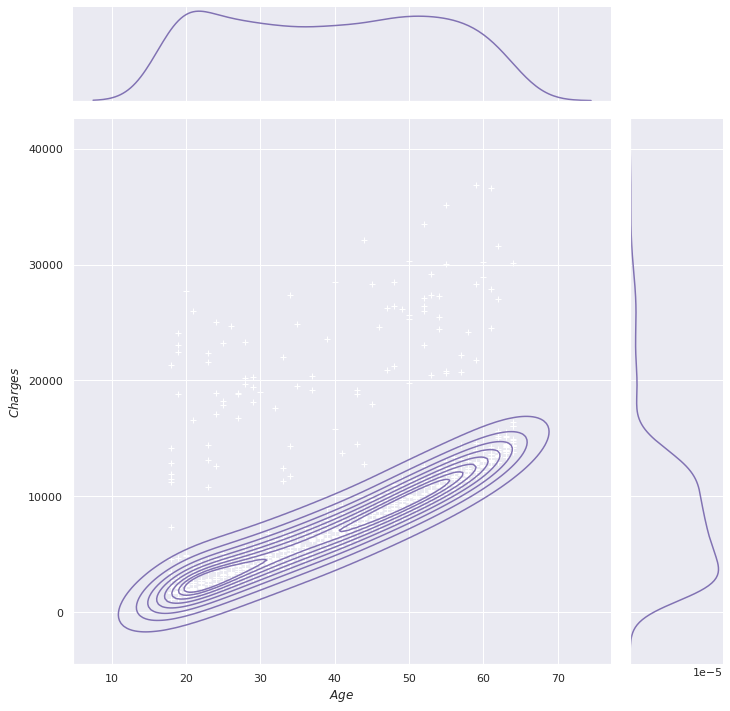

In [55]:
# Distribution of charges and age for non-smokers
g = sns.jointplot(x="age", y="charges", data = df[(df.smoker == 'no')],kind="kde", color="m", height=10, aspect=1)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Age$", "$Charges$")
ax.set_title('Distribution of charges and age for non-smokers')

For non-smokers, the cost of treatment increases as they grow old.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'aspect'
  **contour_kws,


Text(0.5, 1.0, 'Distribution of charges and age for smokers')

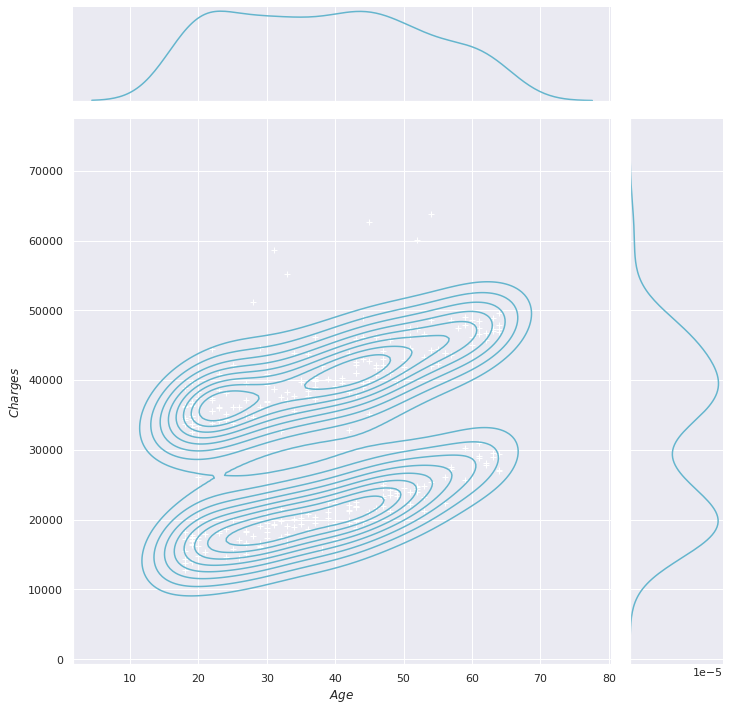

In [57]:
# Distribution of charges and age for smokers
g = sns.jointplot(x="age", y="charges", data = df[(df.smoker == 'yes')],kind="kde", color="c", height=10, aspect=1)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Age$", "$Charges$")
ax.set_title('Distribution of charges and age for smokers')

We see the same trend for smokers but seeing that its bimodal is probably a peculiarity in the data set, seeing that being a smoker is such a strong indicatore of high insurance charge.

##### **How's the Diet?**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


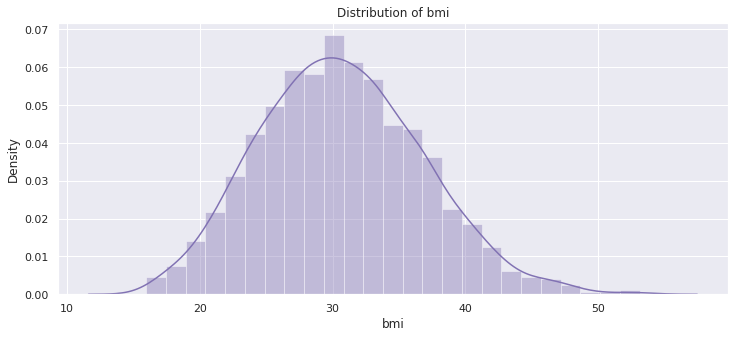

In [58]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(df["bmi"], color = 'm')

In [59]:
df["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

Median BMI is 30, which means 50% of the patients are overweight.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


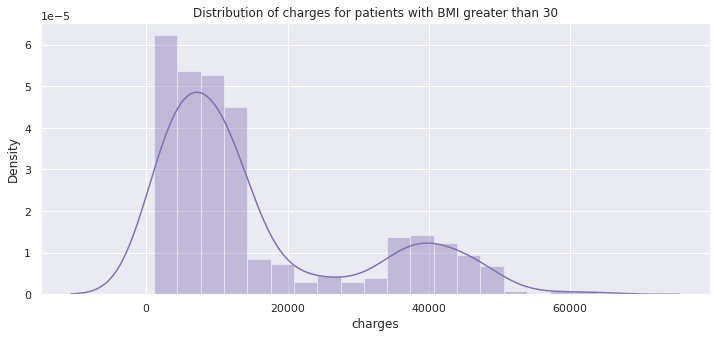

In [61]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'm')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


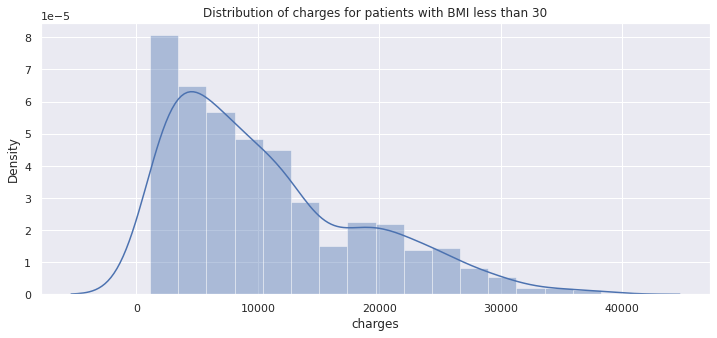

In [62]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = 'b')

Distribution of insurance charges for overweight vs non-overweight says that overweight people get charge a higher insurance charge.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'aspect'
  **contour_kws,


Text(0.5, 1.0, 'Distribution of bmi and charges')

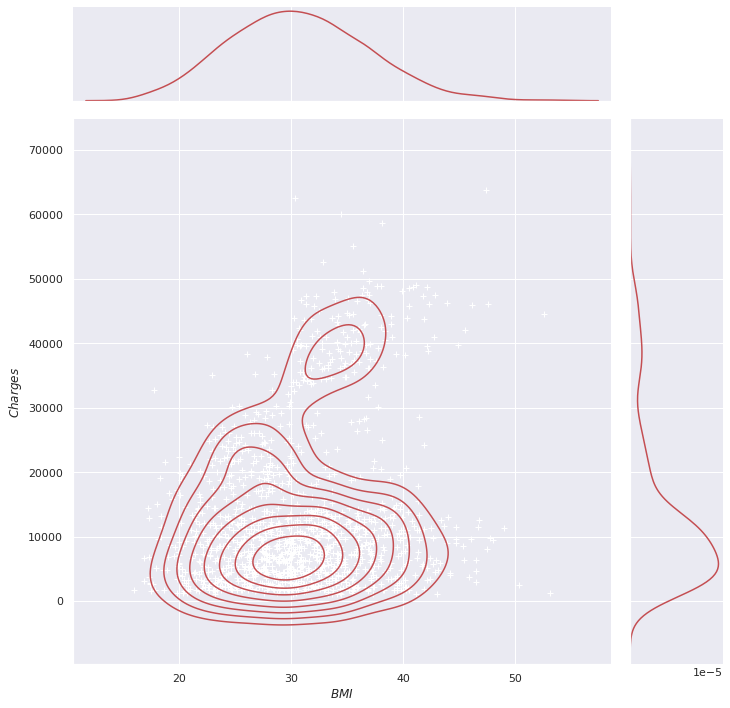

In [63]:
g = sns.jointplot(x="bmi", y="charges", data = df,kind="kde", color="r", height=10, aspect=1)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$BMI$", "$Charges$")
ax.set_title('Distribution of bmi and charges')

##### **Number of Kids**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


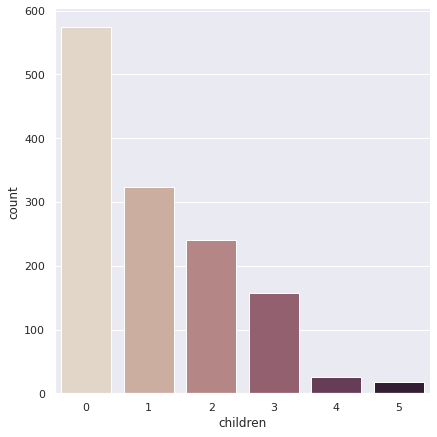

In [64]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=df, size = 6)

Most of these patients have no children.

##### **Do smokers have kids?**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Smokers and non-smokers who have children')

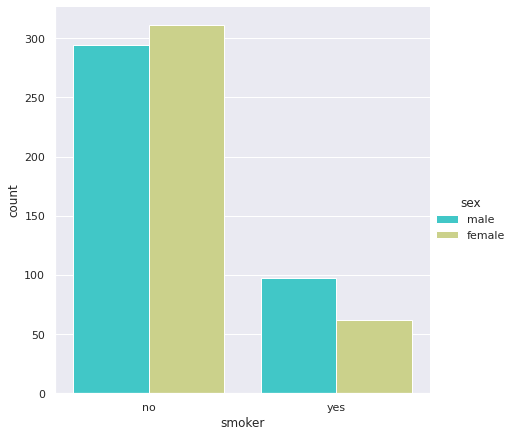

In [65]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=df[(df.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have children')

Majority who have children are non-smokers.

## Pandas Profiling: Speed Up your EDA
===

In [66]:
!pip install pandas_profiling

In [67]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 266kB 4.6MB/s 
     |████████████████████████████████| 71kB 4.4MB/s 
     |████████████████████████████████| 71kB 3.9MB/s 
     |████████████████████████████████| 71kB 4.9MB/s 
     |████████████████████████████████| 604kB 9.3MB/s 
     |████████████████████████████████| 3.1MB 12.0MB/s 
     |████████████████████████████████| 112kB 39.2MB/s 
     |████████████████████████████████| 296kB 45.7MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=e657736b630f5067a07392770430d5874a22c03ccd9a804c2bb05e1fd8a1b893
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=4d6d21e642ffacdab6c4eeb27f3b7cbf3cb59a206aff32ae5f96f70f72b5a36e
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imag

In [68]:
import pandas_profiling as pp
from pandas_profiling.utils.cache import cache_file

In [70]:
insurance_report = pp.ProfileReport(df, title='Insurance Pricing Dataset Profiling Report')

In [71]:
insurance_report.to_file("insurance_regression.html")

In [72]:
files.download('insurance_regression.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Part II: Data cleaning and preparation**

In [73]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#### **Remove Duplicates**

In [75]:
# NOT APPLICABLE
# Remove duplicate in customer_id, keep last occurence
# df.drop_duplicates(subset ="customer_id", keep = 'last', inplace = True) 
  
# displaying data 
# df.head(10)

#### **Fix inconsistent labels**

In [77]:
print(df['region'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [ ]:
# Fix inconsistent category labels of 'region'

#insurance_df['region'].replace('s.west','southwest', inplace=True)
#insurance_df['region'].replace('n.west','northwest', inplace=True)
#insurance_df['region'].replace('s.east','southeast', inplace=True)
#insurance_df['region'].replace('n.east','northeast', inplace=True)
#insurance_df['region'].replace('nrtheast','northeast', inplace=True)


In [78]:
#print(insurance_df['region'].value_counts())

In [79]:
print(df['sex'].value_counts())

male      676
female    662
Name: sex, dtype: int64


In [ ]:
# Fix inconsistent category labels of 'sex'

#insurance_df['sex'].replace('woman','female', inplace=True)
#insurance_df['sex'].replace('man','male', inplace=True)

In [ ]:
#print(insurance_df['sex'].value_counts())

male      674
female    662
Name: sex, dtype: int64


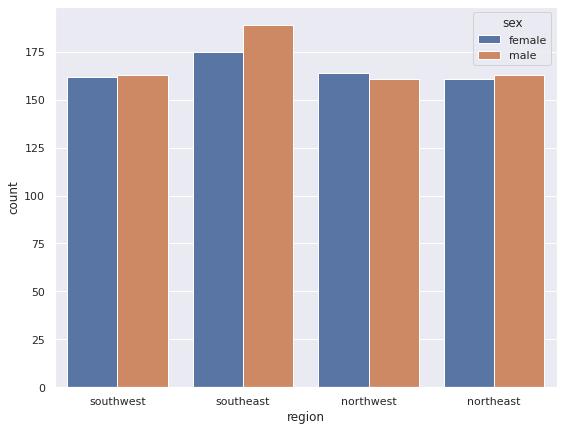

In [83]:
sns.set(rc={'figure.figsize':(9,7)})
sns.countplot(x="region",hue="sex", data=df)

#### **Remove columns with low or no variability in values**

In [84]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [85]:
# Remove 'smoker' column since there's no variability in values

#df = df.drop(['smoker'], axis=1)
#df.head(10)

#### **Handle missing values**

In [86]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [87]:
# Impute missing 'bmi' values
# Use mean if distribution is symmetric, else use median

# insurance_df['bmi'] = insurance_df['bmi'].fillna((insurance_df['bmi'].median()))
# insurance_df['bmi'] = insurance_df['bmi'].fillna((insurance_df['bmi'].mean()))

In [88]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [89]:
# Impute missing 'charges' values
# Use mean if distribution is symmetric, else use median

# insurance_df['charges'] = insurance_df['charges'].fillna((insurance_df['charges'].mean()))

#insurance_df['charges'] = insurance_df['charges'].fillna((insurance_df['charges'].median()))

In [90]:
#insurance_df.isnull().sum()

#### **Final touches**

Since we are primarily interested in the amount of costs see what factors are more correlated with charges. For a start, we will encode categorical features.


In [91]:
#df = df.drop(['customer_id'], axis=1)
#df.head(1)

In [5]:
# Convert strings to onehot encoding

onehot_df = pd.get_dummies(df)
onehot_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


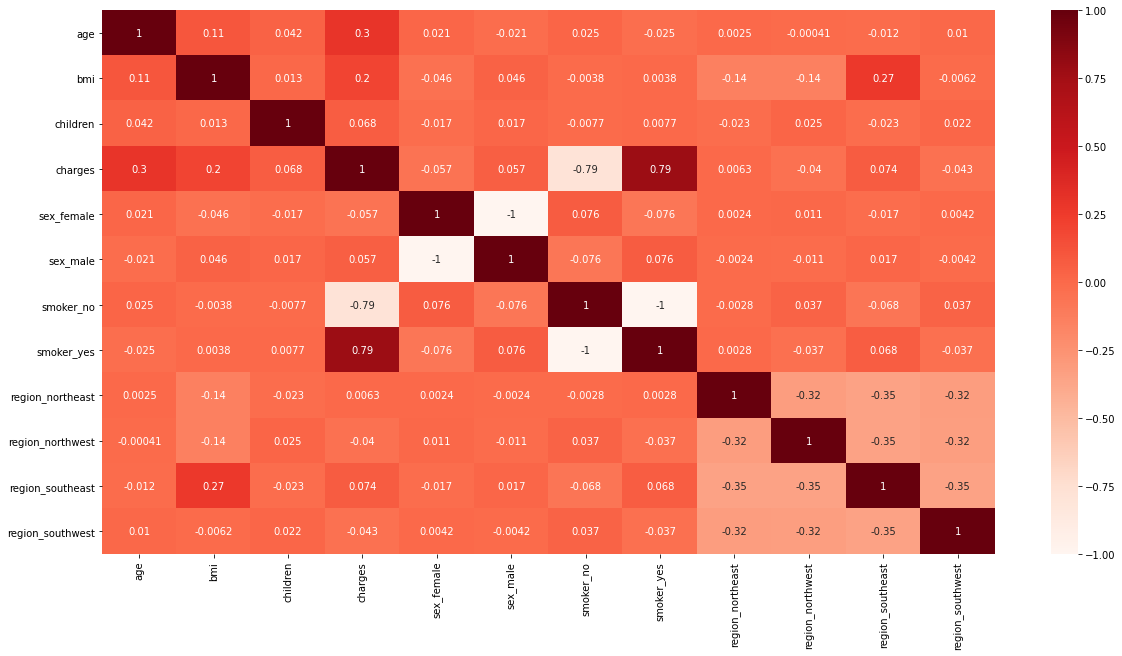

In [6]:
plt.subplots(figsize=(20,10))
sns.heatmap(onehot_df.corr(), annot=True, cmap='Reds')

- We can see that insurance charges are higher if the person is a smoker. 
- A minor side note is that, there is a weak correlation between BMI and the region_southeast.

Visualizations
===

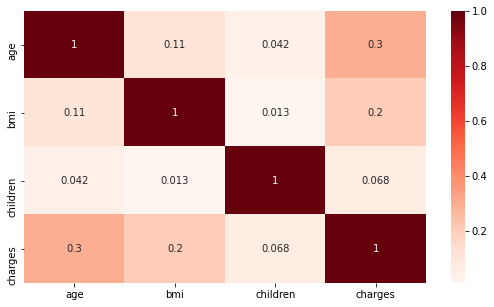

In [12]:
plt.figure(figsize = (9,5))
sns.heatmap(df.corr(), annot = True, cmap = 'Reds')

## SMOKING

In [ ]:
smoker_type = df[["charges","smoker"]].groupby("smoker").mean().sort_values("charges",ascending=False)
smoker_type

,charges
smoker,
yes,32050.231832
no,8434.268298


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


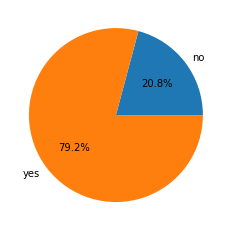

In [ ]:
smoker_type = df[["charges","smoker"]].groupby("smoker").mean()
smoker_labels = smoker_type.sort_values("charges").index 
charges = smoker_type.sort_values("charges")
plt.pie(charges, labels = smoker_labels, autopct='%1.1f%%')
plt.show()

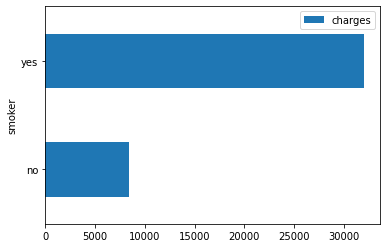

In [ ]:
df[["charges","smoker"]].groupby("smoker").mean().sort_values("charges",ascending=True).plot.barh()

## NUMBER OF CHILDREN

In [ ]:
df[["charges","children"]].groupby("children").mean().sort_values("charges",ascending=False)

,charges
children,
3,15355.318367
2,15073.563734
4,13850.656311
1,12731.171832
0,12365.975602
5,8786.035247


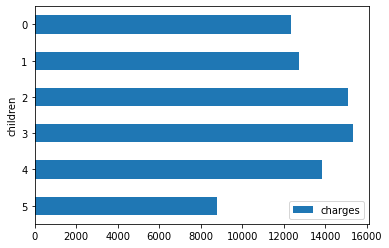

In [ ]:
# NUMBER OF CHILDREN to AVERAGE CHARGES
df[["charges","children"]].groupby("children").mean().sort_values("children",ascending=False).plot.barh()

## BMI

In [ ]:
bmi_class = [(df["bmi"]< 18.5),
             (df["bmi"]>= 18.5) & (df["bmi"] < 25),
             (df["bmi"]>= 25) & (df["bmi"] < 30),
             (df["bmi"]>= 30)]
bmi_title = ["underweight","normal","overweight","obese"]
df["class"] = np.select(bmi_class,bmi_title)
df

,age,sex,bmi,children,smoker,region,charges,class
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


In [ ]:
df[["charges","class"]].groupby("class").mean().sort_values("charges",ascending=False)

,charges
class,
obese,15552.335469
overweight,10987.509891
normal,10409.337709
underweight,8852.200585


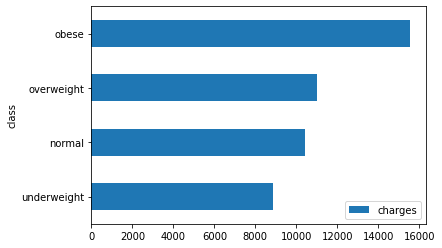

In [ ]:
df[["charges","class"]].groupby("class").mean().sort_values("charges",ascending=True).plot.barh()

## AGE

In [ ]:
age_class = [(df["age"]<= 25),
             (df["age"]>= 26) & (df["age"]<= 35),
             (df["age"]>= 36) & (df["age"]<= 45),
             (df["age"]>= 46) & (df["age"]<= 55),
             (df["age"]>= 56)]
age_title = ["25 and below","26-35","36-45","46-55","55 and above"]
df["age_group"] = np.select(age_class, age_title)
df

,age,sex,bmi,children,smoker,region,charges,class,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,25 and below
1,18,male,33.770,1,no,southeast,1725.55230,obese,25 and below
2,28,male,33.000,3,no,southeast,4449.46200,obese,26-35
3,33,male,22.705,0,no,northwest,21984.47061,normal,26-35
4,32,male,28.880,0,no,northwest,3866.85520,overweight,26-35
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese,46-55
1334,18,female,31.920,0,no,northeast,2205.98080,obese,25 and below
1335,18,female,36.850,0,no,southeast,1629.83350,obese,25 and below
1336,21,female,25.800,0,no,southwest,2007.94500,overweight,25 and below


In [ ]:
df[["charges","age_group"]].groupby("age_group").mean().sort_values("age_group",ascending=True)

,charges
age_group,
25 and below,9087.015807
26-35,10495.163047
36-45,13493.485247
46-55,15986.900310
55 and above,18795.993816


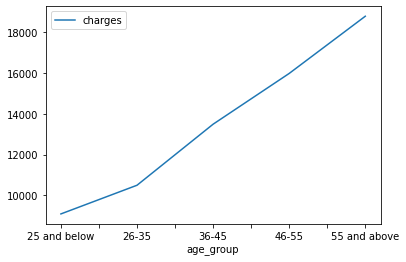

In [ ]:
df[["charges","age_group"]].groupby("age_group").mean().sort_values("age_group",ascending=True).plot.line()

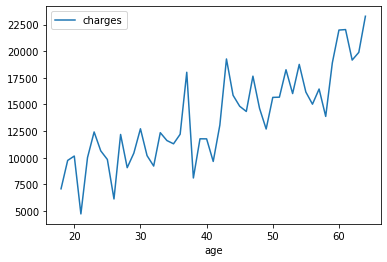

In [ ]:
df[["charges","age"]].groupby("age").mean().sort_values("age",ascending=True).plot.line()

## REGION

In [ ]:
df[["charges","region"]].groupby("region").mean().sort_values("charges",ascending=False)

,charges
region,
southeast,14735.411438
northeast,13406.384516
northwest,12417.575374
southwest,12346.937377


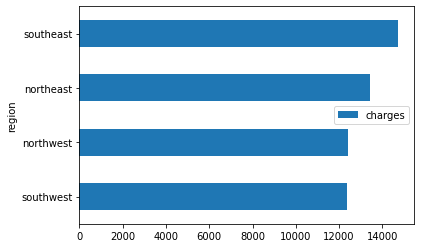

In [ ]:
df[["charges","region"]].groupby("region").mean().sort_values("charges",ascending=True).plot.barh()

## SEX

In [ ]:
sex_type = df[["charges","sex"]].groupby("sex").mean().sort_values("charges",ascending=False)
sex_type

,charges
sex,
male,13956.751178
female,12569.578844


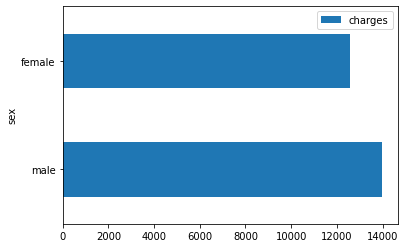

In [ ]:
df[["charges","sex"]].groupby("sex").mean().sort_values("charges",ascending=False).plot.barh()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


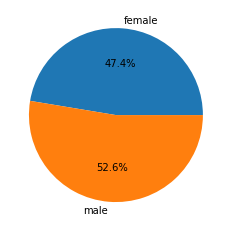

In [ ]:
sex_labels = sex_type.sort_values("charges").index 
charges = sex_type.sort_values("charges")
plt.pie(charges, labels = sex_labels, autopct='%1.1f%%')
plt.show()

## Correlation of SMOKING and SEX

In [ ]:
smoker_sex = df.groupby(["smoker","sex"]).agg("count")["age"]
smoker_sex

smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
Name: age, dtype: int64

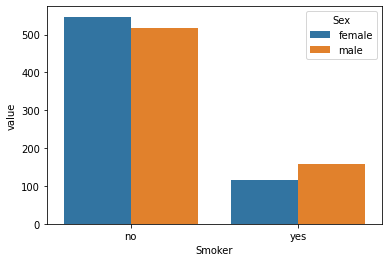

In [ ]:
 smoker_list = list(df["smoker"])
 sex_list = list(df["sex"])
 df1 = pd.DataFrame({"Smoker":smoker_list, "Sex":sex_list})
 ct = pd.crosstab(df1.Smoker, df1.Sex)

 stacked = ct.stack().reset_index().rename(columns={0:'value'})
 sns.barplot(x=stacked.Smoker, y=stacked.value, hue=stacked.Sex)